In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [161]:
user_data = pd.read_csv("user_data.csv")
ads_data = pd.read_csv("ads_data.csv")

user_messages = pd.read_csv("user_messages.csv")
user_messages_test = pd.read_csv("user_messages_test.csv")

In [20]:
ads_data.describe()

,ad_id,category_id,seller_id,price,lat,long,enabled
count,6.451680e+05,645168.000000,645168.000000,6.451660e+05,118780.000000,118780.000000,645168.000000
mean,2.099651e+06,810.648930,362482.657593,5.291704e+03,-34.395014,-58.212330,0.465958
std,7.590905e+05,96.171769,188890.016736,9.827501e+05,2.701056,4.317663,0.498840
min,9.000000e+00,362.000000,3.000000,0.000000e+00,-50.146811,-127.868312,0.000000
25%,1.632318e+06,806.000000,196764.000000,1.500000e+02,-34.642215,-58.556401,0.000000
50%,2.363885e+06,815.000000,380132.000000,3.400000e+02,-34.601383,-58.461624,0.000000
75%,2.712724e+06,853.000000,530852.000000,8.500000e+02,-34.560532,-58.406016,1.000000
max,2.922041e+06,888.000000,646815.000000,7.777778e+08,65.585720,41.234036,1.000000


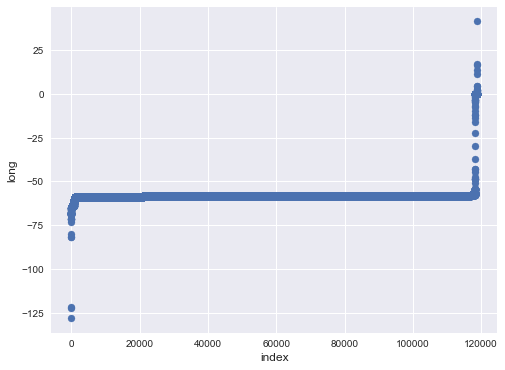

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(range(ads_data.shape[0]), np.sort(ads_data.long.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('long', fontsize=12)
plt.show()

In [35]:
count = 0
for i in range(ads_data.shape[0]):
    if ads_data.lat[i] > -30:
        count+=1
print(count)

775


In [15]:
user_messages.shape

(10348, 3)

In [14]:
user_messages_test.shape

(10507, 2)

In [18]:
ads_data.shape

(645168, 11)

# Blazing Fast and Dirty Approach

In [44]:
ads_categ = ads_data[['ad_id', 'category_id']]

In [46]:
final_ads = pd.merge(user_data, ads_categ, how='left', on='ad_id')

In [55]:
final_ads.head()

,event,ad_id,category_id
0,view,2426321,888
1,view,2746814,815
2,view,1123948,853
3,first_message,2273498,815
4,view,2722493,815


In [54]:
final_ads = final_ads[['event', 'ad_id', 'category_id']]

In [144]:
temp = final_ads[final_ads.event == "first_message"]
temp = pd.DataFrame(temp.groupby(['category_id'])['ad_id'].value_counts())

In [146]:
user_messages_test['ads'] = np.zeros(user_messages_test.shape[0])

In [149]:
dict1 = {}
categs = list(set(final_ads.category_id))
for i in categs:
    portal = final_ads[final_ads.category_id == i]
    dict1[i] = list(portal.ad_id.value_counts()[:10].index)

In [151]:
for i in range(user_messages_test.shape[0]):
#     portal = final_ads[final_ads.category_id == user_messages_test.category_id[i]]
#     lst = list(portal.ad_id.value_counts()[:5])
    if i % 1000 == 0:
        print(i, "iterations done")
    strs = str(dict1[user_messages_test.category_id[i]])
    user_messages_test['ads'][i] = strs

0 iterations done


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ADMIN\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1000 iterations done
2000 iterations done
3000 iterations done
4000 iterations done
5000 iterations done
6000 iterations done
7000 iterations done
8000 iterations done
9000 iterations done
10000 iterations done


In [152]:
user_messages_test.head()

,user_id,category_id,ads
0,2,800,"[2814436, 2806603, 2816630, 2816336, 2802819, ..."
1,6,815,"[2234932, 2434247, 2796911, 2812937, 2812849, ..."
2,14,811,"[2626729, 2764838, 1928465, 2753896, 2727592, ..."
3,14,800,"[2814436, 2806603, 2816630, 2816336, 2802819, ..."
4,17,815,"[2234932, 2434247, 2796911, 2812937, 2812849, ..."


In [153]:
user_messages_test.to_csv("ads_recommendation.csv", index=False)

# Using GraphLab

In [13]:
import numpy as np
import pandas as pd
import graphlab as gl

In [4]:
user_data = pd.read_csv("user_data.csv")
ads_data = pd.read_csv("ads_data.csv")

user_messages = pd.read_csv("user_messages.csv")
user_messages_test = pd.read_csv("user_messages_test.csv")

In [5]:
train_data = pd.merge(user_messages, user_data, how='left', on='user_id')
train_data = pd.merge(train_data, ads_data, how='left', on='ad_id')

In [6]:
test_df =  pd.merge(user_messages_test, user_data, how='left', on='user_id')
test_df = pd.merge(test_df, ads_data, how='left', on='ad_id')

In [7]:
train_data = train_data.drop(['lat', 'long', 'event_time', 'user_lat', 'user_long', 'creation_time', 'title', 'description'], axis=1)
test_df = test_df.drop(['lat', 'long', 'event_time', 'user_lat', 'user_long', 'creation_time', 'title', 'description'], axis=1)

In [11]:
final_train = train_data.fillna(value=-999)
final_test = test_df.fillna(value=-999)

AttributeError: 'module' object has no attribute 'popularity_recommender'